<a href="https://colab.research.google.com/github/yuting-tseng/stock_predict/blob/master/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Predict

ref: 
1. [ML預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)
2. [stock module github](https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker)

In [0]:
# !git clone https://github.com/koreal6803/Stocker.git
# !pip install -r Stocker/requirements.txt

In [0]:
import warnings

warnings.filterwarnings('ignore')

In [0]:
import pandas as pd

df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()

date
2000-01-04    178.0
2000-01-05    182.0
2000-01-06    178.0
2000-01-07    173.0
2000-01-10    179.0
Name:  price, dtype: float64

In [0]:
from Stocker.stocker import Stocker
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


Predicted Price on 2018-11-19 00:00:00 = $237.44


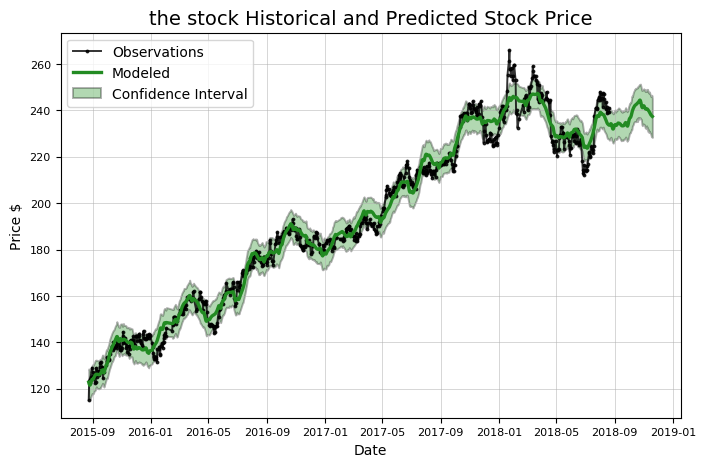

In [0]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $248.37.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.55.
Average Absolute Error on Testing  Data = $15.41.

When the model predicted an increase, the price increased 45.95% of the time.
When the model predicted a  decrease, the price decreased  42.27% of the time.

The actual value was within the 80% confidence interval 71.95% of the time.


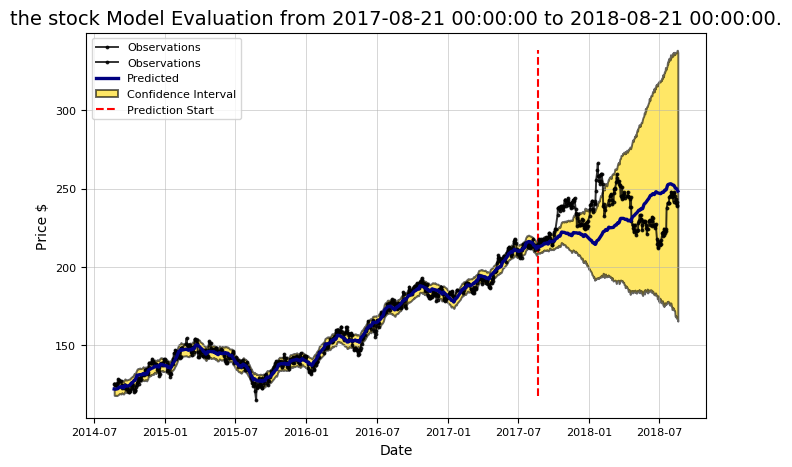

In [0]:
tsmc.evaluate_prediction()

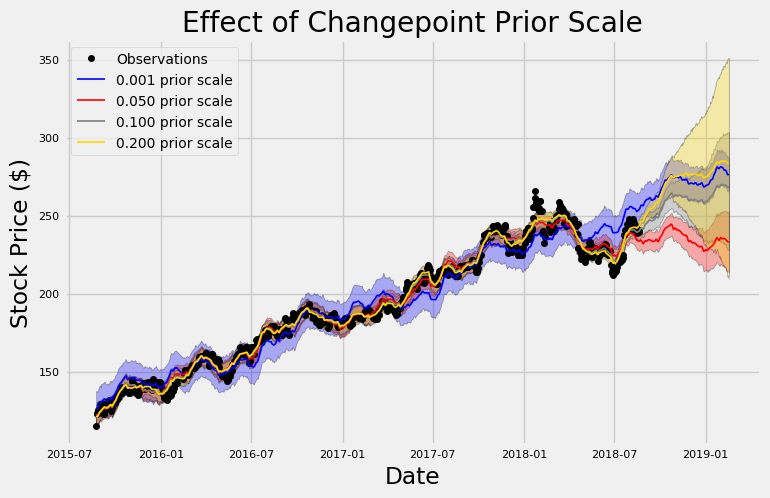

In [0]:
# 我們可以調整短中長期的參數，讓它預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $251.86.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.09.
Average Absolute Error on Testing  Data = $15.29.

When the model predicted an increase, the price increased 48.77% of the time.
When the model predicted a  decrease, the price decreased  48.19% of the time.

The actual value was within the 80% confidence interval 83.33% of the time.


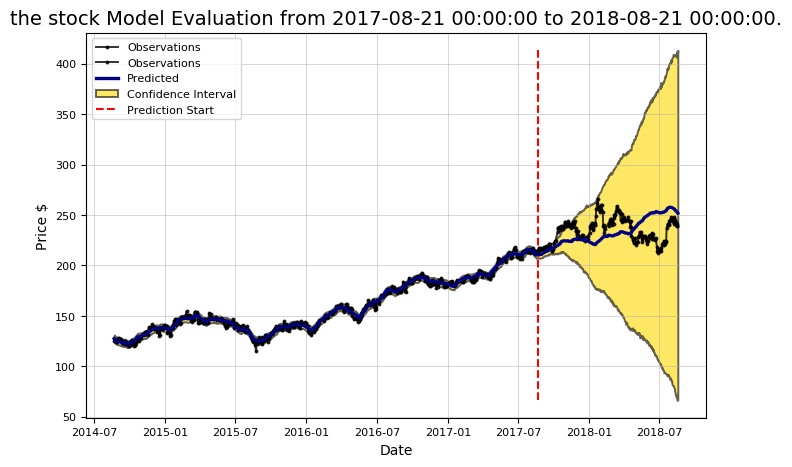

In [0]:
# 我們藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的 我們可以藉由執行predict_future 來預測股價囉！
tsmc.evaluate_prediction()